<a href="https://colab.research.google.com/github/K12TK013A1N/ML-30/blob/main/iris_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#@title Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
print("All imports are done")

All imports are done


In [17]:
#@title Loading into pandas
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map(dict(enumerate(iris.target_names)))
print("Import successfull!!!")

Import successfull!!!


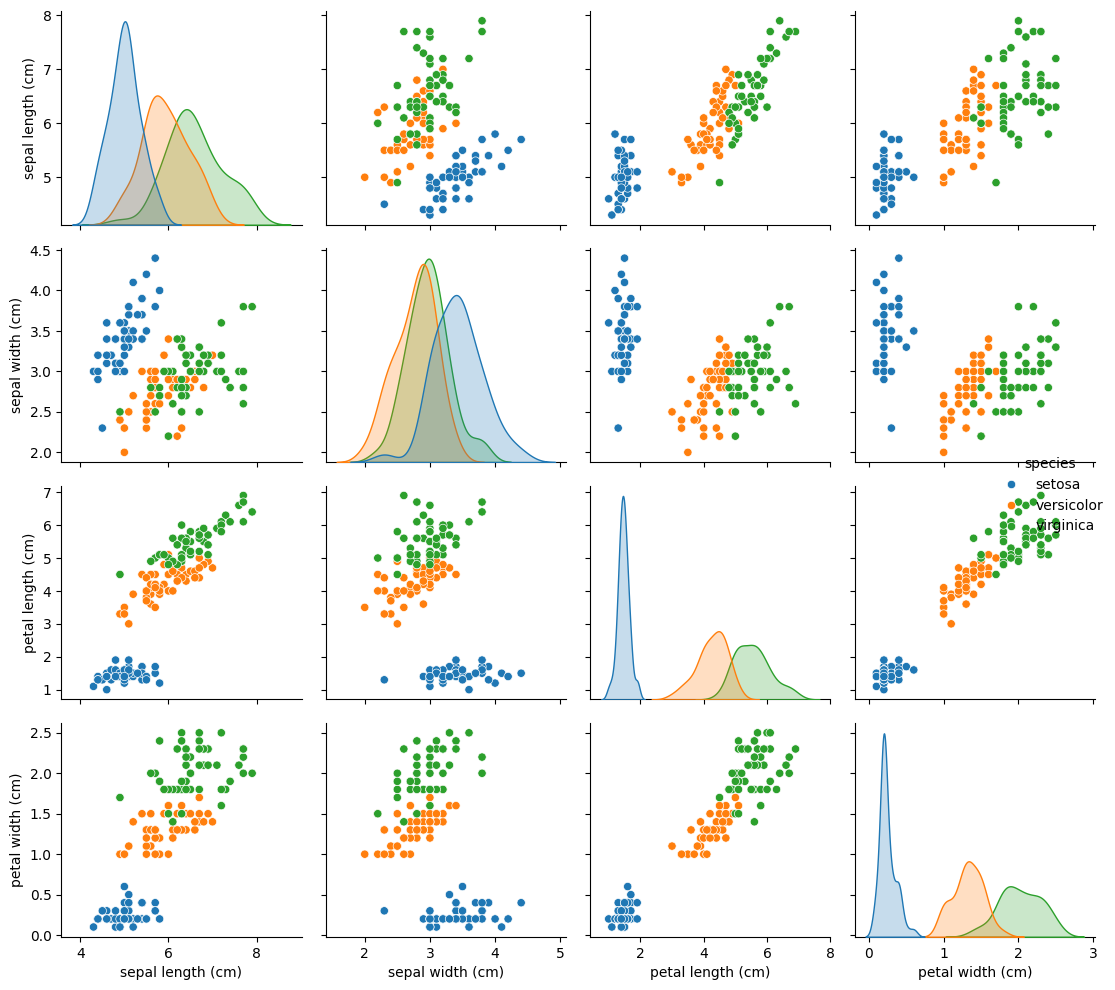

In [19]:
#@title Vizualize Inputs
sns.pairplot(df, vars=iris.feature_names, hue='species')
plt.tight_layout()
plt.show()

In [24]:
#@title preparing data for training and testing
X = df[iris.feature_names]
y = df['target']
#binarizing the labels for ROC plotting
y_bin = label_binarize(y, classes=[0,1,2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Splitted successfully!!")


Splitted successfully!!


In [25]:
#@title Training Model
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [29]:
#@title Prediction and probabilities
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)


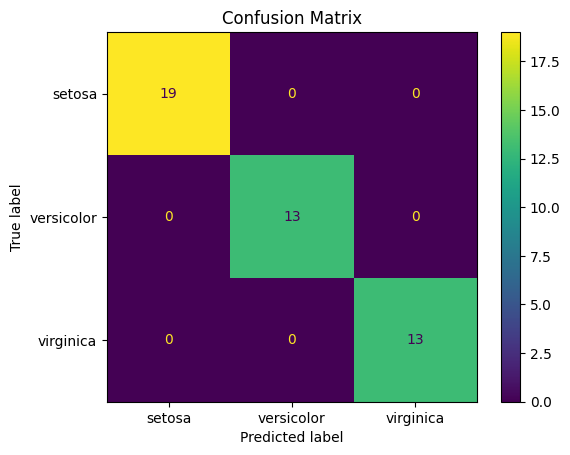

In [30]:
#@title Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

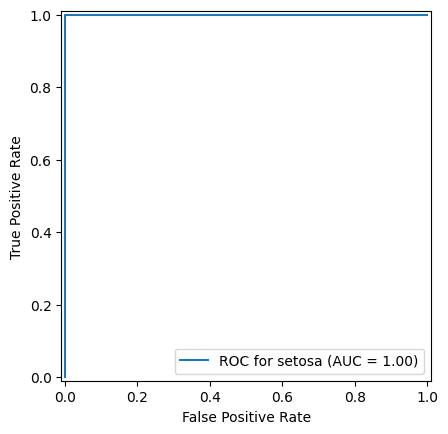

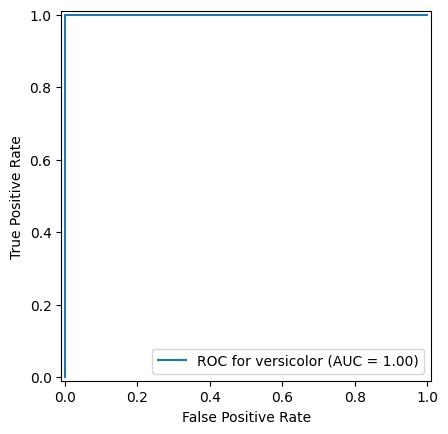

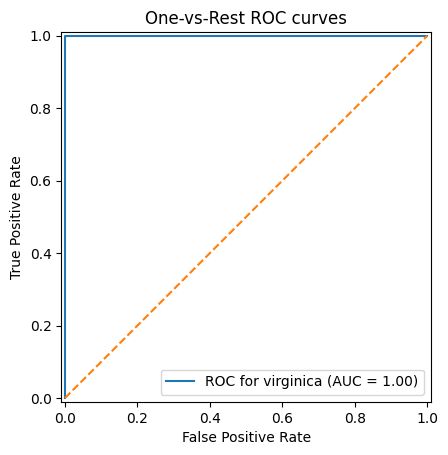

In [33]:
#@title ROC & AUC
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:,i], y_score[:,i])
  roc_auc[i] = auc(fpr[i],tpr[i])

#plot ROC curves for each class
for i in range(n_classes):
  RocCurveDisplay(
      fpr=fpr[i],
      tpr=tpr[i],
      roc_auc=roc_auc[i],
      estimator_name=f"ROC for {iris.target_names[i]}"
  ).plot()

plt.plot([0,1],[0,1], linestyle="--")
plt.title("One-vs-Rest ROC curves")
plt.show()

In [34]:
#@title AUC
for i, name in enumerate(iris.target_names):
  print(f"AUC for class {name:10s} = {roc_auc[i]:.3f}")

AUC for class setosa     = 1.000
AUC for class versicolor = 1.000
AUC for class virginica  = 1.000
